In [47]:
from shapely.geometry import  MultiLineString, mapping, shape, Polygon
from shapely import wkt
import pandas as pd
import geopandas as gpd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt
pd.set_option('display.max_rows', 500)

In [2]:
jams_cimahi = pd.read_csv("Dataset/aggregate_median_jams_Kota Cimahi.csv")
jams_cimahi = jams_cimahi[['street','geometry']]

In [6]:
street_label = pd.read_csv("Dataset_cleaned/street_Kota_Cimahi_labeled.csv")
speed_matrix = pd.read_csv("Dataset_cleaned/agg_jams_speed_Kota_Cimahi_plotting.csv")

In [61]:
speed_matrix.isna().sum()

street        0
Weekday_6     0
Weekday_7     0
Weekday_8     0
Weekday_9     0
Weekday_10    0
Weekday_11    0
Weekday_12    0
Weekday_13    0
Weekday_14    0
Weekday_15    0
Weekday_16    0
Weekday_17    0
Weekday_18    0
Weekday_19    0
Weekday_20    0
Weekend_6     0
Weekend_7     0
Weekend_8     0
Weekend_9     0
Weekend_10    0
Weekend_11    0
Weekend_12    0
Weekend_13    0
Weekend_14    0
Weekend_15    0
Weekend_16    0
Weekend_17    0
Weekend_18    0
Weekend_19    0
Weekend_20    0
dtype: int64

In [13]:
jams_cimahi.head()

,street,geometry
0,Tol Padaleunyi,"MULTILINESTRING ((107.534217 -6.902122, 107.53..."
1,Tol Padaleunyi,"LINESTRING (107.534217 -6.902122, 107.534668 -..."
2,Gerbang Tol Pasteur 2,"MULTILINESTRING ((107.572891 -6.889988, 107.57..."
3,Tol Padaleunyi,"LINESTRING (107.504788 -6.856284, 107.504752 -..."
4,Babakan Loa,"MULTILINESTRING ((107.565449 -6.884513, 107.56..."


In [14]:
street_label.head()

,street,label
0,Gerbang Tol Pasteur 2,1
1,Mahar Martanegara,2
2,N11 Jenderal Haji Amir Machmud,3
3,Jalan Gunung Batu,1
4,Jenderal Gatot Subroto,1


In [7]:
speed_matrix.head()

,street,Weekday_6,Weekday_7,Weekday_8,Weekday_9,Weekday_10,Weekday_11,Weekday_12,Weekday_13,Weekday_14,...,Weekend_11,Weekend_12,Weekend_13,Weekend_14,Weekend_15,Weekend_16,Weekend_17,Weekend_18,Weekend_19,Weekend_20
0,Gerbang Tol Pasteur 2,0.200587,0.159350,0.158442,0.133241,0.131237,0.165703,0.176877,0.153011,0.144458,...,0.178975,0.180366,0.217147,0.204521,0.177176,0.163579,0.175190,0.165679,0.188611,0.227766
1,Mahar Martanegara,0.092954,0.086007,0.079679,0.071349,0.078249,0.084705,0.070746,0.074157,0.083499,...,0.070417,0.070722,0.085861,0.108316,0.093620,0.091760,0.079779,0.073278,0.065696,0.071600
2,N11 Jenderal Haji Amir Machmud,0.073330,0.069030,0.052079,0.052973,0.058579,0.053671,0.051512,0.051373,0.061902,...,0.051785,0.052221,0.059687,0.063102,0.062853,0.058074,0.058541,0.052094,0.077111,0.066836
3,Jalan Gunung Batu,0.103464,0.140495,0.109842,0.086335,0.078853,0.078401,0.075266,0.085484,0.094207,...,0.089451,0.093768,0.099178,0.091256,0.091724,0.093870,0.082508,0.066415,0.058681,0.064229
4,Jenderal Gatot Subroto,0.112325,0.119288,0.104587,0.095683,0.168931,0.107218,0.078898,0.121225,0.105189,...,0.097460,0.116185,0.110821,0.112296,0.115863,0.114080,0.083342,0.090538,0.142109,0.057667


# **1. Geomapping**

In [8]:
# Selecting only street that is included in clustering
jams_cimahi_final = pd.merge(jams_cimahi, street_label, how="left")
jams_cimahi_final = jams_cimahi_final[~jams_cimahi_final['label'].isna()]

In [9]:
jams_cimahi_final['geometry'] = jams_cimahi_final['geometry'].apply(wkt.loads)

In [10]:
gdf_cimahi = gpd.GeoDataFrame(jams_cimahi_final, crs='epsg:4326')
gdf_cimahi.head()

,street,geometry,label
2,Gerbang Tol Pasteur 2,"MULTILINESTRING ((107.57289 -6.88999, 107.5744...",3.0
5,Mahar Martanegara,"MULTILINESTRING ((107.53667 -6.90277, 107.5370...",4.0
6,N11 Jenderal Haji Amir Machmud,"MULTILINESTRING ((107.52996 -6.86878, 107.5310...",2.0
7,N11 Jenderal Haji Amir Machmud,"MULTILINESTRING ((107.53658 -6.87050, 107.5364...",2.0
8,N11 Jenderal Haji Amir Machmud,"MULTILINESTRING ((107.55095 -6.88065, 107.5510...",2.0


In [11]:
gdf_cimahi.shape

(27795, 3)

In [13]:
# Stratify sample geometry for faster plotting
gdf_cimahi_strat = gdf_cimahi.groupby('street').apply(
    lambda x: x.sample(frac=0.20)
)
gdf_cimahi_strat.shape

(5559, 3)

In [92]:
# Adding color map
color_map = {1:"y", 2:"b", 3:"r", 4:"g"}
gdf_cimahi_strat['color'] = gdf_cimahi_strat['label'].map(color_map)

In [93]:
gdf_anot_coords = gdf_cimahi_strat.copy()
gdf_anot_coords['coords'] = gdf_anot_coords['geometry'].apply(lambda x: x.representative_point().coords[:])
gdf_anot_coords['coords'] = [coords[0] for coords in gdf_anot_coords['coords']]

No handles with labels found to put in legend.


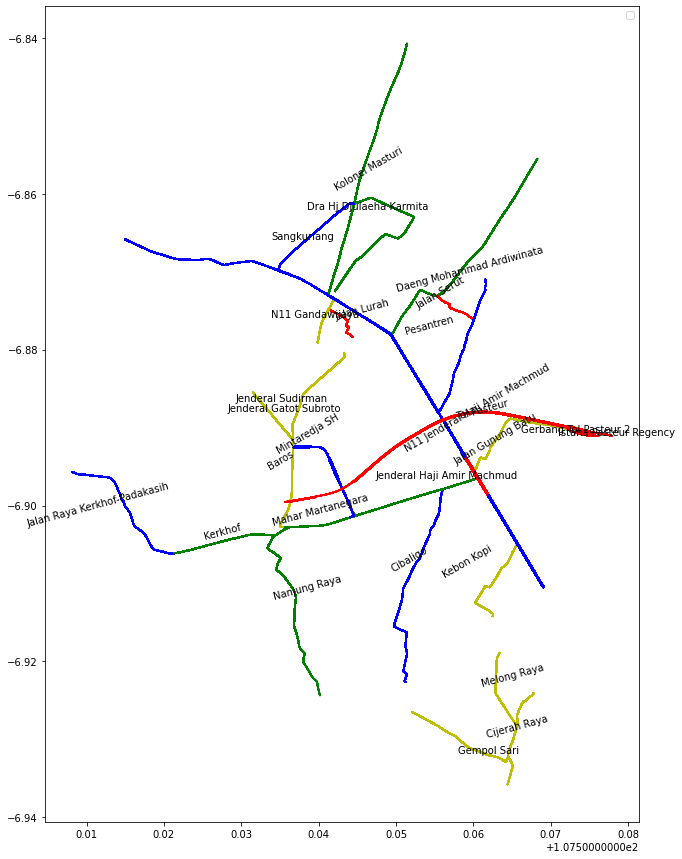

In [95]:
import random

fig, ax = plt.subplots(figsize=(15, 15))
gdf_cimahi_strat["geometry"].plot(color=gdf_cimahi_strat.color, ax=ax)
# ax.set_xlim(0, 1000)
# ax.set_ylim(-7, -6)

for street in gdf_anot_coords.street.unique():
    gdf_filtered = gdf_anot_coords[gdf_anot_coords["street"] == street].sample(1)
    plt.annotate(text=gdf_filtered['street'].values[0], 
                 xy=(np.array(gdf_filtered.coords)[0][0]+np.random.uniform(-0.005, 0.005, 1), np.array(gdf_filtered.coords)[0][1]), 
                 horizontalalignment="center", color="black", rotation=random.choice([0, 15, 30]))
plt.legend()


# **2. Traffic Flow Trend Between Grooup**

In [63]:
speed_labeled = pd.merge(speed_matrix, street_label, how="left")
speed_labeled.head()

,street,Weekday_6,Weekday_7,Weekday_8,Weekday_9,Weekday_10,Weekday_11,Weekday_12,Weekday_13,Weekday_14,...,Weekend_12,Weekend_13,Weekend_14,Weekend_15,Weekend_16,Weekend_17,Weekend_18,Weekend_19,Weekend_20,label
0,Gerbang Tol Pasteur 2,0.200587,0.159350,0.158442,0.133241,0.131237,0.165703,0.176877,0.153011,0.144458,...,0.180366,0.217147,0.204521,0.177176,0.163579,0.175190,0.165679,0.188611,0.227766,3
1,Mahar Martanegara,0.092954,0.086007,0.079679,0.071349,0.078249,0.084705,0.070746,0.074157,0.083499,...,0.070722,0.085861,0.108316,0.093620,0.091760,0.079779,0.073278,0.065696,0.071600,4
2,N11 Jenderal Haji Amir Machmud,0.073330,0.069030,0.052079,0.052973,0.058579,0.053671,0.051512,0.051373,0.061902,...,0.052221,0.059687,0.063102,0.062853,0.058074,0.058541,0.052094,0.077111,0.066836,2
3,Jalan Gunung Batu,0.103464,0.140495,0.109842,0.086335,0.078853,0.078401,0.075266,0.085484,0.094207,...,0.093768,0.099178,0.091256,0.091724,0.093870,0.082508,0.066415,0.058681,0.064229,1
4,Jenderal Gatot Subroto,0.112325,0.119288,0.104587,0.095683,0.168931,0.107218,0.078898,0.121225,0.105189,...,0.116185,0.110821,0.112296,0.115863,0.114080,0.083342,0.090538,0.142109,0.057667,1


In [64]:
speed_label_agg = speed_labeled.iloc[:,1:]
speed_label_agg = speed_label_agg.groupby("label").mean().reset_index()
speed_label_agg

,label,Weekday_6,Weekday_7,Weekday_8,Weekday_9,Weekday_10,Weekday_11,Weekday_12,Weekday_13,Weekday_14,...,Weekend_11,Weekend_12,Weekend_13,Weekend_14,Weekend_15,Weekend_16,Weekend_17,Weekend_18,Weekend_19,Weekend_20
0,1,0.135841,0.130080,0.107899,0.102007,0.104662,0.097456,0.086889,0.090390,0.105473,...,0.087957,0.088039,0.099491,0.102518,0.094301,0.098934,0.084584,0.083814,0.104099,0.078841
1,2,0.070819,0.067144,0.061354,0.064786,0.062045,0.060233,0.057788,0.058122,0.067887,...,0.054864,0.058767,0.068897,0.072517,0.068734,0.074002,0.059489,0.051719,0.061777,0.058425
2,3,0.198864,0.201179,0.172863,0.144603,0.156225,0.147137,0.165871,0.158698,0.169850,...,0.167378,0.154172,0.177829,0.170403,0.164651,0.168347,0.165729,0.189953,0.170286,0.150980
3,4,0.099659,0.091461,0.068463,0.069532,0.072842,0.072248,0.063859,0.077516,0.084391,...,0.091608,0.090586,0.099891,0.090650,0.086496,0.093241,0.092074,0.085806,0.089573,0.086843


In [65]:
# Transforming into tidy data
speed_label_tidy = pd.DataFrame(columns=["label", "day_type", "hour", "traffic_flow"])

for col in speed_label_agg.columns[1:]:
    for label in speed_label_agg["label"]:
        day_type = col[:7]
        if len(col) == 9:
            hour = int(col[-1])
        else:
            hour = int(col[-2:])
        traffic_flow = speed_label_agg[speed_label_agg["label"] == label][col].values[0]
        
        new_row = {"label":label, "day_type":day_type, "hour":hour, "traffic_flow":traffic_flow}
        speed_label_tidy = speed_label_tidy.append(new_row, ignore_index=True)
        
speed_label_tidy.head()

,label,day_type,hour,traffic_flow
0,1,Weekday,6,0.135841
1,2,Weekday,6,0.070819
2,3,Weekday,6,0.198864
3,4,Weekday,6,0.099659
4,1,Weekday,7,0.130080


In [53]:

flights = sns.load_dataset("flights")
flights = flights.pivot("month", "year", "passengers")
flights.head()


year,1949,1950,1951,1952,1953,1954,1955,1956,1957,1958,1959,1960
month,,,,,,,,,,,,
Jan,112,115,145,171,196,204,242,284,315,340,360,417
Feb,118,126,150,180,196,188,233,277,301,318,342,391
Mar,132,141,178,193,236,235,267,317,356,362,406,419
Apr,129,135,163,181,235,227,269,313,348,348,396,461
May,121,125,172,183,229,234,270,318,355,363,420,472


In [66]:
pivot_1 = speed_label_tidy[speed_label_tidy["label"] == 1].pivot_table(index="day_type", columns="hour", values="traffic_flow")
pivot_1.head()

hour,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20
day_type,,,,,,,,,,,,,,,
Weekday,0.135841,0.130080,0.107899,0.102007,0.104662,0.097456,0.086889,0.090390,0.105473,0.090714,0.087748,0.098715,0.098453,0.089439,0.081339
Weekend,0.038319,0.096802,0.115228,0.100005,0.099584,0.087957,0.088039,0.099491,0.102518,0.094301,0.098934,0.084584,0.083814,0.104099,0.078841


In [67]:
# Pivot 
pivot_1 = speed_label_tidy[speed_label_tidy["label"] == 1].pivot_table(index="day_type", columns="hour", values="traffic_flow")
pivot_2 = speed_label_tidy[speed_label_tidy["label"] == 2].pivot_table(index="day_type", columns="hour", values="traffic_flow")
pivot_3 = speed_label_tidy[speed_label_tidy["label"] == 3].pivot_table(index="day_type", columns="hour", values="traffic_flow")
pivot_4 = speed_label_tidy[speed_label_tidy["label"] == 4].pivot_table(index="day_type", columns="hour", values="traffic_flow")

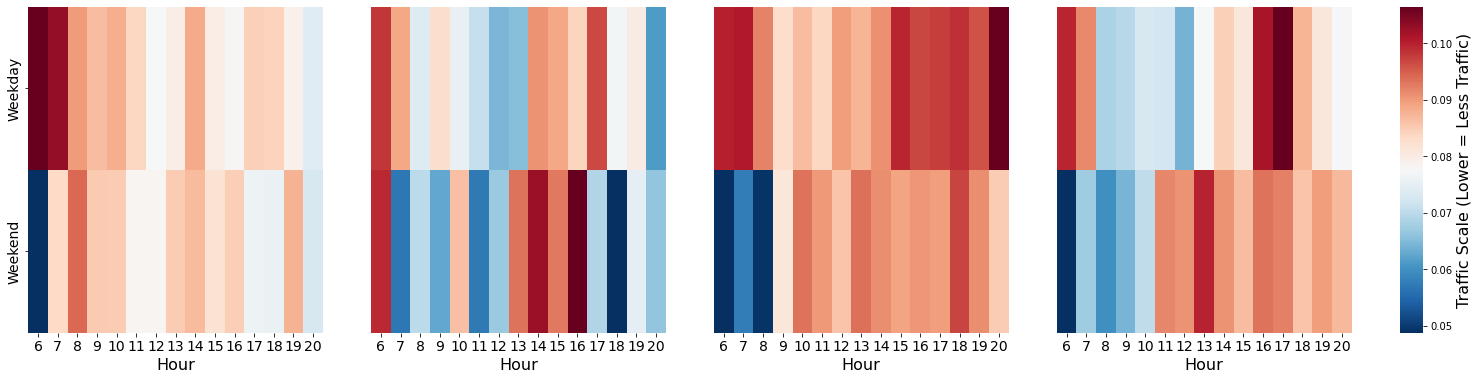

In [91]:

f,(ax1, ax2, ax3, ax4, axcb) = plt.subplots(1,5, 
            gridspec_kw={'width_ratios':[1,1,1,1,0.08]},
            figsize=(25,6))

ax1.get_shared_y_axes().join(ax2,ax3,ax4)
g1 = sns.heatmap(pivot_1,cmap="RdBu_r",cbar=False,ax=ax1)
g1.set_ylabel('')
g1.set_xlabel('Hour', fontsize=16)
g1.tick_params(axis='both', which='major', labelsize=14)

g2 = sns.heatmap(pivot_2,cmap="RdBu_r",cbar=False,ax=ax2)
g2.set_ylabel('')
g2.set_xlabel('Hour', fontsize=16)
g2.set_yticks([])
g2.tick_params(axis='both', which='major', labelsize=14)

g3 = sns.heatmap(pivot_3,cmap="RdBu_r",cbar=False, ax=ax3)
g3.set_ylabel('')
g3.set_xlabel('Hour', fontsize=16)
g3.set_yticks([])
g3.tick_params(axis='both', which='major', labelsize=14)

g4 = sns.heatmap(pivot_4,cmap="RdBu_r",ax=ax4, cbar_ax=axcb, cbar_kws={'label': 'Traffic Scale (Lower = Less Traffic)'})
g4.set_ylabel('')
g4.set_xlabel('Hour', fontsize=16)
g4.set_yticks([])
g4.tick_params(axis='both', which='major', labelsize=14)

axcb.yaxis.label.set_size(16)
